<h1><center>Introduction to Computational Neuroscience</center></h1>
<h1><center> Practice VI: Artificial Neural Networks </center></h1>
<center>Aqeel Labash, Daniel Majoral, Raul Vicente</center>

### Important:
Make sure that you saved your ipynb file correctly to avoid loss of information. Please submit this **ipynb** file only (unless you have extra files then zip this file with the extra ones). Everything should be included in this file questions, answers, codes, plots, and comments about your solutions.

My Student ID is: <font color='green'>[YOUR ANSWER]</font> and it took me approximately: <font color='green'>[YOUR ANSWER]</font> hours to complete the home work.

The data of how long it took you to complete the home work will help us to improve the home works to be balanced.

### Before you start:
You need to install few more packages to run this excercise. So activate your environment then run:

1. Install library to show sequeice of images: `pip install JSAnimation`
2. Installing keras:
   1. If you a nvidia GPU (only nvidia) and you would like to see it in action (besides games ;) ):
      1. `conda install tensorflow-gpu`
      2. `pip install keras`
   2. If you don't have nvidia GPU or you want something more simple (with gpu you might need to do some extra work)
      1. `conda install keras`

## 1.Introduction
In this session we are going to have a brief look on artificial neural networks. We start with simplest artificial neuron model called perceptron. Then we will see how simple feed-forward neural networks can be thought of as universal function approximators and what their limitations are.

## Exercise 1 : Perceptron (1pt)
![title](imgs/perceptron.png)
<p style="text-align: center;"> <b>Figure 1:</b> Simple perceptron.</p> 

Perceptron is the simplest artificial network model invented by Frank Rosenblatt in late 1950s. He added a learning rule to McCulloch-Pitts neuron, that allows it to learn certain functions from example inputs and outputs.

Perceptron works on binary data – both its inputs $x_j$ and output $y$ are ones or zeros. Output 1 or 0 can be thought of as binary classification – whether object represented by the given input belongs to certain class or not. 

Perceptron’s weights $w_j$ can be any real numbers. Its prediction is calculated with following formula:

$$
y = \left\{
	\begin{array}{l l}
		1, \text{if } x_1 w_1 + ... + x_m w_m + b \geq 0\\
		0, \text{otherwise}
	\end{array}
	\right.
$$



Here $b$ is the bias term, that is added to the sum. In practice it is easier to just add additional input, which is always one. Then we don’t have to treat bias as something special, it is just an additional weight to learn. The learning rule for the perceptron is very simple:

$$
w_j = w_j + (t_i - y_i) x_{ij}
$$

wher index $i$ denotes the $i$-th example data point. The learning rule must be applied for all data points and for each weight. You will continue updating the weights until all data points are classified correctly.

It turns out, that the perceptron is always able to successfully learn a classification rule for datasets, which are *linearly separable* -- data points with label 1 and label 0 can be separated by a line (in case of two inputs), plane (in case of three inputs) or hyperplane (in case of input of any dimensionality). If the dataset is not linearly separable, perceptron will never *converge* (settle to a certain set of weight values).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import display, HTML
%matplotlib inline
# Keras is a library for developing neural networks.
from keras.models import Model
from keras.layers import Input,Dense
from keras.optimizers import sgd

Using TensorFlow backend.


In [2]:

# Function to read data sets
def Load_data(dataset_name='dataset1.csv'):
    ds = pd.read_csv('data/{}'.format(dataset_name),header=None)
    ds.columns = ['x1','x2','y']
    return ds

# Function to plot data
def Plot_perceptron(ax,X,y,weights=None,title='perceptron classification'):
    ax.clear()
    def scat(ax,dat,size,co,mar):
        ax.scatter(dat[:,0], dat[:,1],s=size, c=co,marker=mar)
    
    if weights is None:
        predictions=y
    else:
        predictions = (np.dot(X, weights)>=0)
        # apply threshold - result is either 0 or 1
        
    pos_data_correct   = X[(y == 1) & (predictions == 1)]
    pos_data_incorrect = X[(y == 1) & (predictions == 0)]
    neg_data_correct   = X[(y == 0) & (predictions == 0)]
    neg_data_incorrect = X[(y == 0) & (predictions == 1)]
    plt.title(title)
    # plot positive examples classified correctly as blue crosses
    size = 100
    #plt.scatter(pos_data_correct.values[:,0], pos_data_correct.values[:,1],s=size, c='b',marker='+')
    scat(ax,pos_data_correct,size,'b','+')
    # plot positive examples classified incorrectly as red crosses
    scat(ax,pos_data_incorrect,size,'r','+')
    # plot negative examples classified correctly as green circles
    scat(ax,neg_data_correct,size,'g','o')
    # plot negative examples classified incorrectly as red circles
    scat(ax,neg_data_incorrect,size,'r','o')
    ax.legend(['TP','FN','TN','FP'])
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    if weights is not None:
        ax.plot([-5, 5], [-(weights[2]-5*weights[0])/weights[1],-(weights[2]+5*weights[0])/weights[1]],c='black')
        

**Your task is**
1. Fill in the perceptron learning rule

In [ ]:
I_draw_it = False
errors=[]
def train_perceptron(name):
    global errors,I_draw_it
    errors=[]
    I_draw_it = False
    data = Load_data(name)
    # store number of samples and weights for convenience
    X = data.values[:,:2]
    
    num_samples = X.shape[0]
    
    # Notice here we added one for the bias.
    num_weights = X.shape[1]+1
    # Here we add one more column of ones (1s) to represent the bias.
    X = np.hstack([X,np.ones((num_samples,1))])
    
    target = data.values[:,2]
    fig,ax = plt.subplots()
    Plot_perceptron(ax,X,target,title='Data set')
    y=target
    w = np.random.randn(num_weights)
    
    # Just long enough loop for most examples to converge
    fig,ax = plt.subplots()
    
    def animate(k):
        global I_draw_it
        # plot data and classification boundary
        # - blue crosses are correctly classified positive samples
        # - red crosses are incorrectly classified positive samples
        # - green circles are correctly classified negative samples
        # - red circles are incorrectly classified negative samples
        # - black line shows decision boundary (not always visible!)        
        #

        # calculate activations - input multiplied by weights
        # NB! we calculate all samples at once using vectorized implementation!
        a = np.dot(X, w)
        # apply threshold - result is either 0 or 1
        y = (a >= 0);

        # number of errors - where result didn't match target
        num_errors = sum(y != target)
        
        # collect error history
        errors.append(num_errors)
        # if there were no errors then stop
        if num_errors == 0:
            if I_draw_it:
                return
            else:
                I_draw_it=True
                print('We have {} errors'.format(num_errors))
                Plot_perceptron(ax,X,target,weights=w);
                return
        else:
            print('We have {} errors'.format(num_errors))
            Plot_perceptron(ax,X,target,weights=w);
            

        # otherwise do the learning
        for i in range(num_samples):
            for j in range(num_weights):
                #######################################
                ######## Your code Starts Here ########
                # TODO: fill in the perceptron learning rule! (adding learning rate is not needed)
                #w[j] = ???
                ######### Your code ends Here #########
                #######################################
    anim = matplotlib.animation.FuncAnimation(fig, animate,frames=21)#, interval=20, blit=True)
    HTML(anim.to_jshtml())
    # plot error history
    plt.figure()
    plt.plot(errors);
    plt.title('Perceptron error history');
    plt.xlabel('Iteration');
    plt.ylabel('Number of errors');
    plt.xticks(range(20))
    plt.xlim((0, 20));
    plt.ylim((0, 20));
    return anim
    #return error

2. Try datasets 1,2,3,4 and report (repeat the following cell in the next 3 cells and replace the data set number)
   1. if they are linearly separable or not. Of course, in 2D one can do this by just looking at the data, but in higher dimensional data this would not be the case.
   2. For linearly separable datasets also add the approximate number of steps it took for the perceptron to convergence (to reach 0 errors).
   
**Note:** make sure you saved your report after generating the plots. Because we want to see the final image you got with the decision boundary (the black line) for all four datasets. Where **Decision boundary** is a line (plane/hyperplane) that separates the positive and negative datapoints - positives will be one one side and negatives on the other side. 

In [ ]:
anim = train_perceptron('dataset1.csv')
HTML(anim.to_jshtml())

<font color=green>Your answer</font>

In [ ]:
#######################################
######## Your code Starts Here ########
#DATA SET 2

#anim = ????

######### Your code ends Here #########
#######################################
HTML(anim.to_jshtml())

<font color=green>Your answer</font>

In [ ]:
#######################################
######## Your code Starts Here ########
#DATA SET 3

#anim = ????

######### Your code ends Here #########
#######################################
HTML(anim.to_jshtml())

<font color=green>Your answer</font>

In [ ]:
#######################################
######## Your code Starts Here ########
#DATA SET 4

#anim = ????

######### Your code ends Here #########
#######################################
HTML(anim.to_jshtml())

<font color=green>Your answer</font>

----
# Sinusoid
## Exercise 2 : Function Approximation (1.5pt)
Universal Approximation Theorem states that any continuous function can be approximated to any desired precision by a feed-forward network with a single hidden layer containing a finite number of non-linear neurons. In practice this theorem is of no use, because:
  1. It states only, that these functions can be <u>represented</u> by feed-forward network with one hidden layer. The theorem doesn’t say anything about if this approximation is <u>learnable</u> - if with our current algorithms we can find the necessary weight values;
  2. The construction used in the proof uses a huge number of neurons in the hidden layer. This would be unreasonable for any practical application;
  3. As the theorem doesn’t consider learnability, it also doesn’t state anything about how well the networks generalizes to samples beyond its training data.

Nevertheless the theorem is a nice concept to guide your thinking – if some problem can be described as a function calculating output based on several inputs, then it probably can be approximated reasonably well with an artificial neural network.
![title](imgs/sine.png)

In this task we are going to approximate sine function using a neural network. This neural network is very simple – it consists of just one input node (the $x$ value), several hidden nodes and one output node ($y = sin(x)$).

Hidden nodes use sigmoid activation function to achieve non-linearity (the nodes apply sigmoid function to the weighted sum of their inputs). Output node is linear, no activation function is applied. Loss function is simply squared error:

$$
L = \frac{1}{2n}\sum_{i=1}^{n} (target_i - predicted_i)^2
$$

It calculates average loss over all $n$ data points in the training set.

For creating neural networks we are making use of **Keras** package desigiend originally by François Chollet.

For this exercise you need to run the following code with different number of nodes and answer the questions.

In [3]:
# Keras is a library for developing neural networks.
from keras.models import Model
from keras.layers import Input,Dense
from keras.optimizers import sgd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import animation
from IPython.display import display, HTML
from JSAnimation import IPython_display
%matplotlib inline
import math

In [4]:
#PLOT_SINUSOID Plots sinusoid with target points and approximation.
def Plot_sinusoid(ax,p_train_x, p_train_y, p_test_x=None, p_test_y=None,num=None):
    """
    Plots sinusoid with target points and approximation.
    """
    ax.clear()
    if p_test_x is not None:
        minx = np.min(p_test_x)
        maxx = np.max(p_test_x)
    else:
        minx = np.min(p_train_x)
        maxx = np.max(p_train_x)
    sinx = np.arange(minx,maxx,0.1)
    siny = np.sin(sinx)
    ax.plot(sinx,siny,'g',label='Sinusoid function')
    
    ax.scatter(p_train_x, p_train_y, s=80, facecolors='none', edgecolors='r',label='Samples we use')
    
    if (p_test_x is not None) and (p_test_y is not None):
        ax.plot(p_test_x,p_test_y,c='b',label='Testing {}'.format(num))
    ax.legend()
    ax.set_title('Sinusoid approximation');
    ax.set_xlabel('x');
    ax.set_ylabel('sin(x)')
    ax.set_ylim([-2,2])
    #return fig

# Function to create the neural network.
def Create_Neural_network(hidden_size=5,learning_rate=0.1,momentum=0.9,weights=None):
    
    # One feature per sample
    x = Input((1,))

    # 5 hidden nodes with sigmoid as activation function
    h = Dense(hidden_size,activation='sigmoid',bias_initializer='random_uniform')(x)

    # One output with linear activation function.
    out = Dense(1,activation='linear',bias_initializer='random_uniform')(h)

    # Define a model
    model = Model(inputs=[x],outputs=[out])

    # Stochastic gradient descent with the specificed
    # learning rate and momentum.
    optimizer = sgd(lr=learning_rate,momentum=momentum)

    # Compile the model to generate the computation graph
    model.compile(optimizer=optimizer,loss='mse')
    if weights is not None:
        model.set_weights(weights)
        
    return model

def Plot_sinsuide_Component(model):
    """
    Plots contributions of each hidden node.
    Notice that we are not taking bias into account.
    """
    test_x = np.arange(-4*np.pi,4*np.pi,0.1)
    # Get the input layer
    x = model.get_layer(index=0)
    # Get the hidden layer
    h = model.get_layer(index=1)
    # Create new model where the hidden layer is the output
    nmodel = Model(inputs=x.input,outputs=h(x.input))
    values = nmodel.predict(test_x)
    
    # multiply the hidden nodes with the weights for the output node.
    values = values * model.get_weights()[2].T
    # add the bias for the output
    values += model.get_weights()[3][0]
    #Notice that we didn't sum, if we some we will get exactly the expected output.
    
    plt.figure(figsize=(12,6))
    for i in range(values.shape[1]):
        plt.subplot(2,1,1)
        plt.plot(test_x,values[:,i],label='node: {}'.format(i+1))

    plt.title('Hidden nodes contributions')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(test_x,values.sum(axis=1)+model.get_weights()[3])
    plt.title('Sum of hidden node contributions (+ bias)')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.tight_layout()

def sinusoid(hidden_size=5,learning_rate=0.1,momentum=0.9,ns=20,weights=None):
    print("this function will take around 20s depending on your computer specs")
    # Create dataset
    range_start = -2*np.pi;
    range_end = 2*np.pi;
    num_samples = ns;
    step = (range_end - range_start) / (num_samples - 1);
    # define x, calculate y and plot sinusoid
    # - green line is sinusoid function
    # - red circles are samples we use
    train_x = np.arange(range_start,range_end,step)
    # notice that we are adding some noise to train_y
    train_y = np.sin(train_x) + 0.1 * np.random.randn(train_x.shape[0]);
    
    fig,ax = plt.subplots()
    Plot_sinusoid(ax,train_x, train_y)
    
    model = Create_Neural_network(hidden_size=hidden_size,learning_rate=learning_rate,momentum=momentum,weights=weights)
    # loop to animate learning
    
    def animate(k):
        global loss
        if k==0:
            return
        # set up training parameters
        # Entire dataset is a batch
        batchsize = num_samples;

        # Initially train shorter time to make animation more interesting
        #numepochs = min(k * 10,200);                  
        numepochs = 10
        # randomize the order of samples
        size=train_y.shape[0]
        index = np.random.choice(np.arange(size),size=size,replace=False)

        # train the network
        history = model.fit(train_x[index], train_y[index],epochs=numepochs,verbose=0)
        loss = np.concatenate([loss,history.history['loss']])

        # use fine-grained range for testing
        test_x = np.arange(-4*np.pi,4*np.pi,0.1)
        # calculate predictions on testing range - we willnot use this actually
        test_y = model.predict(test_x)

        # plot training examples and approximation
        Plot_sinusoid(ax,train_x, train_y, test_x, test_y,num=k)
    
    anim = matplotlib.animation.FuncAnimation(fig, animate,frames=21)
    #Force execution before plotting the loss
    HTML(anim.to_jshtml())
    
    # plot loss
    plt.figure()
    plt.plot(loss)
    plt.title('Evolution of loss during learning')
    plt.xlabel('Training Epoch nr')
    plt.ylabel('Loss on training set')
    plt.ylim((0, np.max(loss)))
    
    ###########################
    ######## Attention ########
    # You might want to uncomment the following line for Excercise 2-2
    
    #Plot_sinsuide_Component(model=model)
    ###########################
    ###########################
    return anim
    


def minimal_sinusoid(hidden_size=5,learning_rate=0.1,momentum=0.9,ns=20):
    model = Create_Neural_network(hidden_size=hidden_size)
    weights= model.get_weights()
    weights[3][0]=-5 # bias of the output

    # first sinusoid
    weights[2][0,0]=2 # steepness of first sinusoid
    weights[1][0]=-7 # shift on x axis
    weights[0][0,0]=1 #+1/-1 for the increasing/decreasing sinusoid

    # second sinusoid
    weights[2][1,0]=2
    weights[1][1]=7
    weights[0][0,1]=1

    # 3rd
    weights[2][2,0]= 2;
    weights[1][2]= 0;
    weights[0][0,2]= 1;

    #4
    weights[2][3,0]= 2;
    weights[1][3]= 3;
    weights[0][0,3]= -1;
    #5

    weights[2][4,0]= 2;
    weights[1][4]= -3;
    weights[0][0,4]= -1;

    return sinusoid(hidden_size=hidden_size,learning_rate=learning_rate,momentum=momentum,ns=ns,weights=weights)

1. First run the **sinusoid** function exactly as it is. The script creates a neural network that tries to approximate the sine function between $-2\pi\ and\ 2\pi$, based on 20 training data points. The neural network has 5 hidden nodes. All the weights and biases are initialized with random values. It would be best if you understand more of less what the code does (read the comments). 
   1. Notice that the script will generate a plot that shows the true shape of the sine, the training data points, and the current approximation made by the network. This plot is updated as we pass over the training data and learn the weights. After the learning has finished another plot appears, summarizing how the loss decreased during training. Add the two plots to the report. Answer the following questions:
   2. Does the neural network represent the function well within the range $-2\pi\ to\ 2\pi$? If not, how many of the curves of the sine does the network manage to capture well? (In some cases it might capture the shape well, but if you run it many times it mostly shouldn't) 

In [ ]:
loss = np.array([])  
#######################################
######## Your code Starts Here ########

#anim = ???

######### Your code ends Here #########
#######################################
print(loss[-1])
HTML(anim.to_jshtml())

<font color=green>Your answer</font>

2. Now run the function **minimal_sinusoid**. In this script we also have a network of 5 nodes, but the weights and biases are not initialized randomly, but with useful values given by me (not learned by an algorithm). In this case you should see that the network learns to capture the shape of the sine really well. As you can see - the function can be represented well by a 5-node network, but the learning algorithm we used in Q1 did not allow us to find this approximation. 
   1. Hypothesize why doesn't the network always learn a good solution if we start with randomly initialized weights. In here uncommenting the line  `Plot_sinsuide_Component(test_x=test_x,model=model)` might provide insights.
   2. How good is the network at extrapolation (predicting values outside the range it had training data for)? Why is that not surprising? 

this function will take around 20s depending on your computer specs
0.010111178271472454


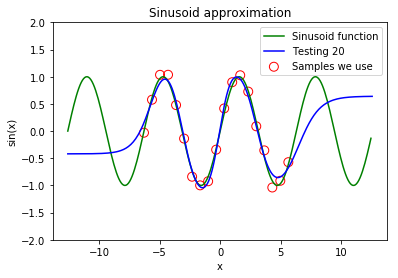

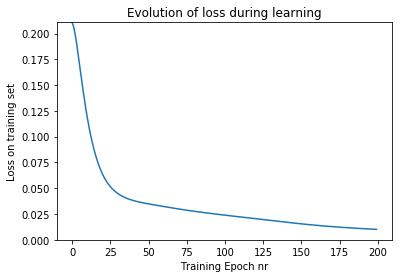

In [5]:
loss=np.array([])
#######################################
######## Your code Starts Here ########

anim = minimal_sinusoid()

######### Your code ends Here #########
#######################################
print(loss[-1])
HTML(anim.to_jshtml())

3. Increase the number of hidden nodes in **sinusoid** function, by passing `hidden_nodes` parameter with the desired number.
   1. How many hidden nodes do you need so that starting from randomly initalized parameters the learning algorithm would converge to a good representation of the function (training loss$<0.1$). Run the code couple of times for each tested number of nodes and report the result if at least one trial is good. Keep the plot with the datapoints and the approximation (don't run the cell again basically).

In [ ]:
loss = np.array([])  
#######################################
######## Your code Starts Here ########

#anim = ???

######### Your code ends Here #########
#######################################
print(loss[-1])
HTML(anim.to_jshtml())

<font color=green>Your answer</font>